# Resultados DEMO

En primer lugar probaremos la segmentación de una imagen en la demo de la página web.

Slice 30 del dato 29 una FLAIR Y T1 de utrecht.
SLICE 30 del dato  60 una FLAIR y t1 singapore

Vamos a comenzar observando un corte transversal de una FLAIR proviniente de UTRECHT( en concreto la 29)
<div style="display:flex; justify-content: space-around;">
    <img src="imagenSAM/FLAIRUTRECHT.png" alt="GIF 1" style="width:33%;">
    <img src="imagenSAM/MASKUTRECHT.png" alt="GIF 2" style="width:33%;">
</div>

La demo nos permite 3 opciones para segmentar. La primera opción es HOVER AND CLICK. Solo detecta el fondo o el cerebro.

<div style="display:flex; justify-content: space-around;">
<img src="imagenSAM/HOVER&CLICK.gif" alt="GIF 3" style="width:50%;">
</div>

Si añadimos puntos para que no segmente partes del cerebro, se necesitan demasiados puntos y además no la acaba de definir la máscara de forma correcta

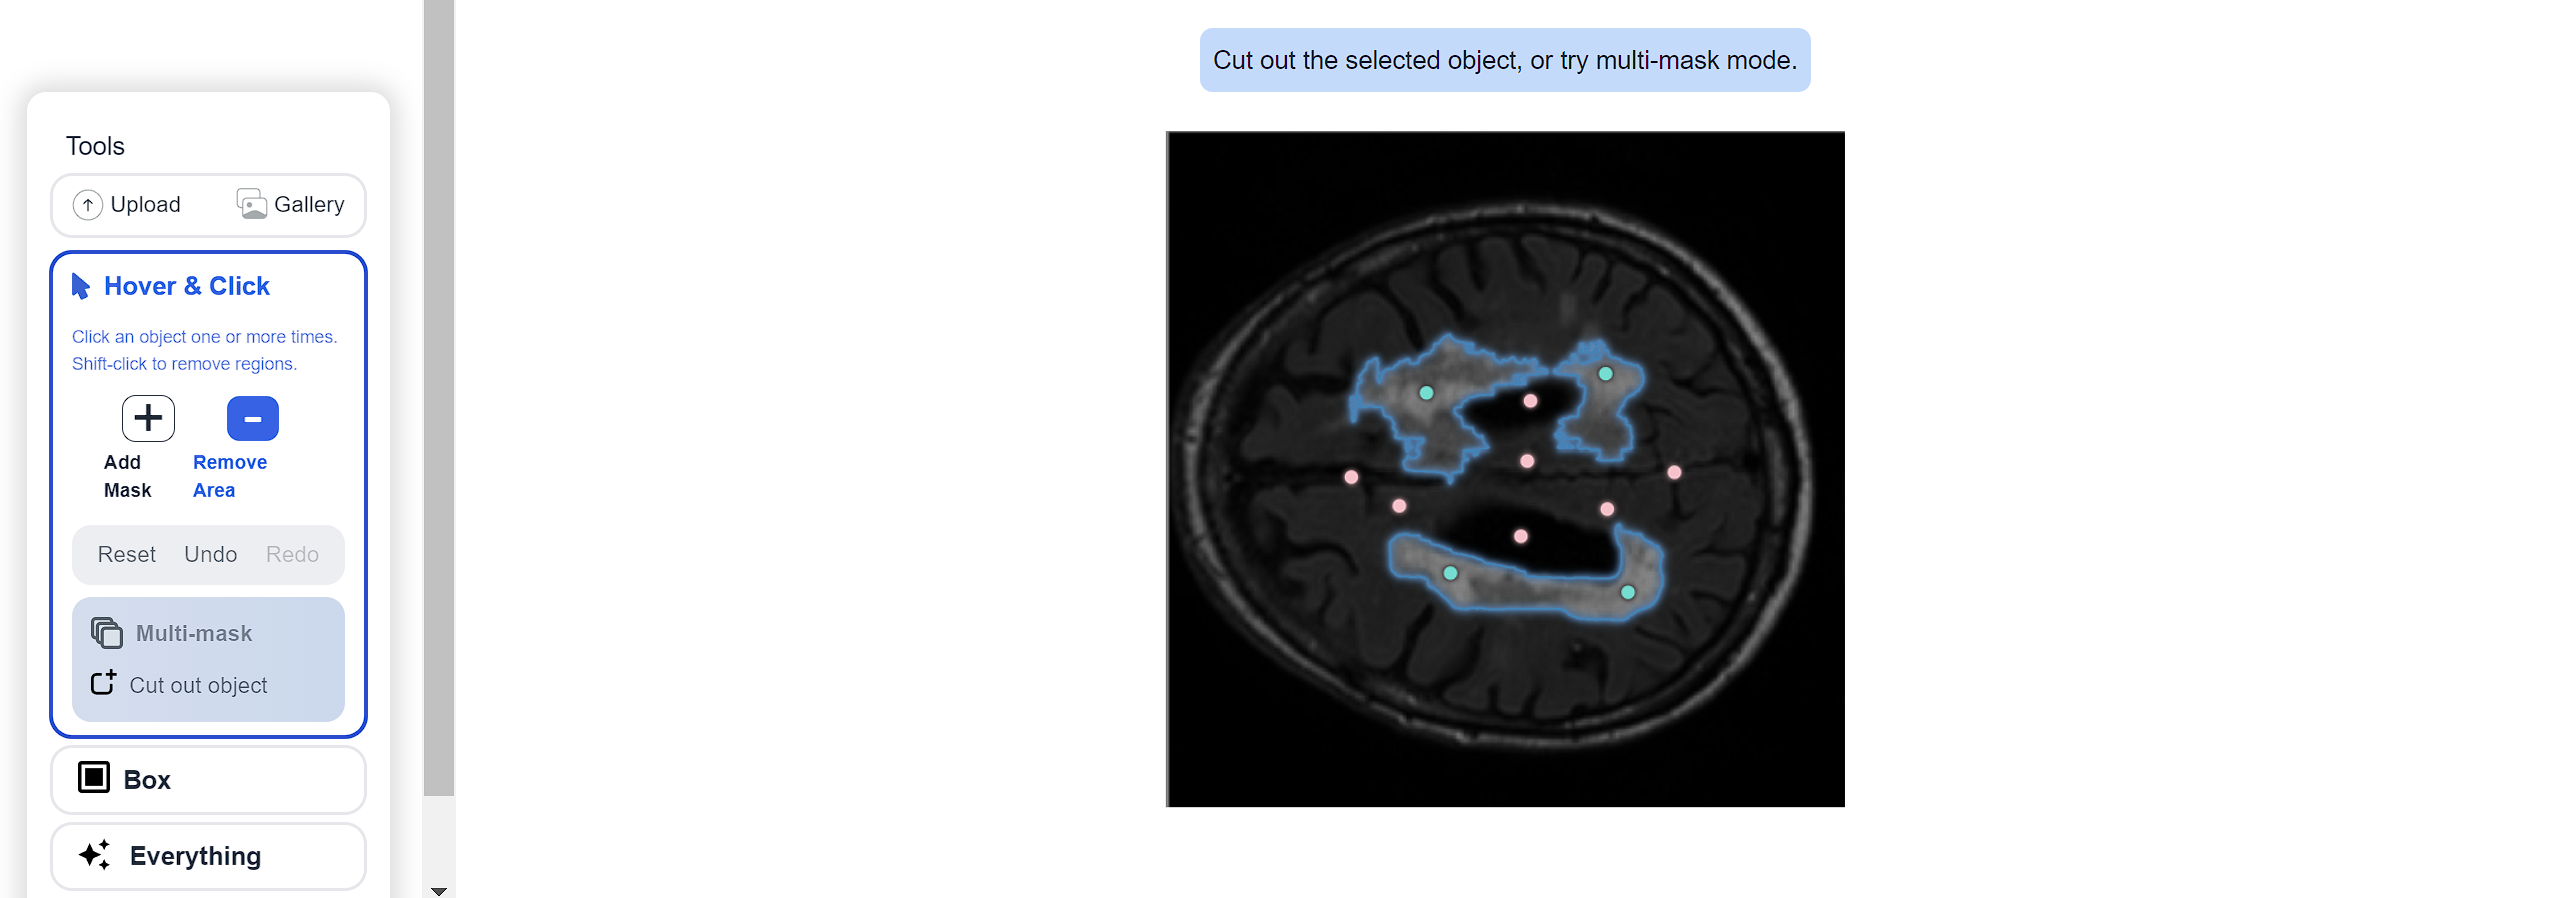

La segunda opción es segment EVERYTHING:Segmenta el cerebro y una parte interior

<div style="display:flex; justify-content: space-around;">
<img src="imagenSAM/Everythting.gif" alt="GIF 3" style="width:50%;">
</div>

Y por último BOX, comenzamos haciendo una caja pequeña que nos permite ampliarla mediante una serie de puntos que hacen que podamos segmentar una de las manchas pero no de una forma tan definida.

<div style="display:flex; justify-content: space-around;">
<img src="imagenSAM/BOX.gif" alt="GIF 3" style="width:50%;">
</div>

Vamos a probar con el correspondiente T1
<div style="display:flex; justify-content: space-around;">
    <img src="imagenSAM/T1UTRECHT.png" alt="GIF 1" style="width:33%;">
    <img src="imagenSAM/MASKUTRECHT.png" alt="GIF 2" style="width:33%;">
</div>

Mostramos el método Box porque los otros dos han producido los mismo resultados. El que mejor ha segmentado ha sido BOX. Gracias a la caja que se crea en un principio, se pueden ir añadiendo puntos para ampliar la máscar y otros para reducirla. Sin embargo, no es correcta totalmente.

<div style="display:flex; justify-content: space-around;">
<img src="imagenSAM/BOXT1.gif" alt="GIF 3" style="width:50%;">
</div>

# Prueba en local 

https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb

In [ ]:
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator

Funciones de soporte y imports

In [14]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  
    
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

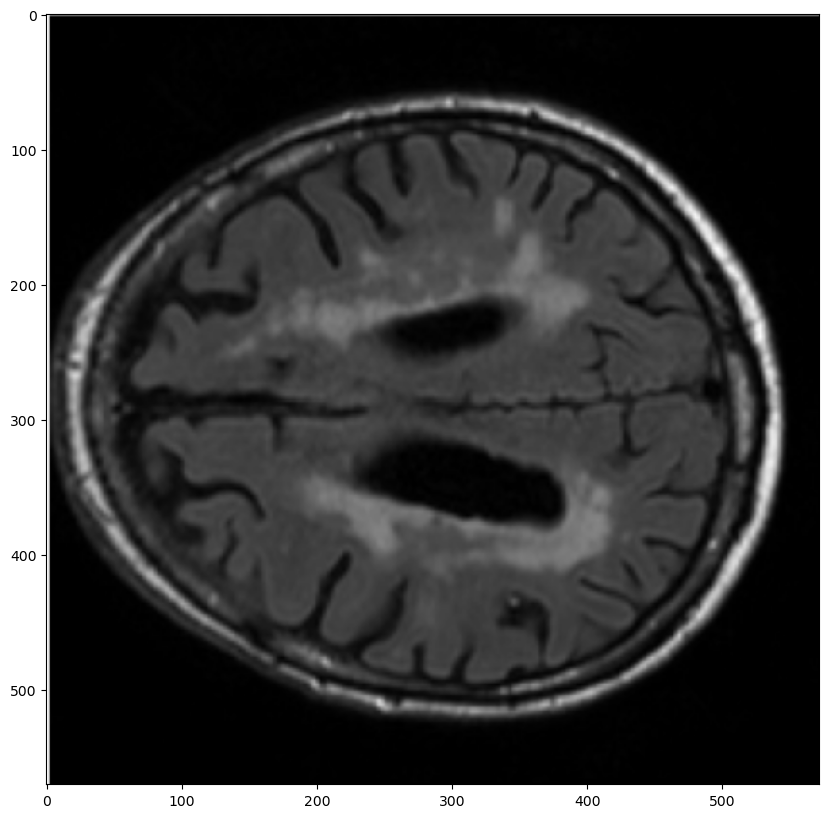

In [15]:
image = cv2.imread('imagenSAM/FLAIRUTRECHT.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

### Segmentación automática de máscaras

In [16]:
use_cuda = False
torch.manual_seed(33)

if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [17]:

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)

predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

In [18]:
masks = mask_generator.generate(image)

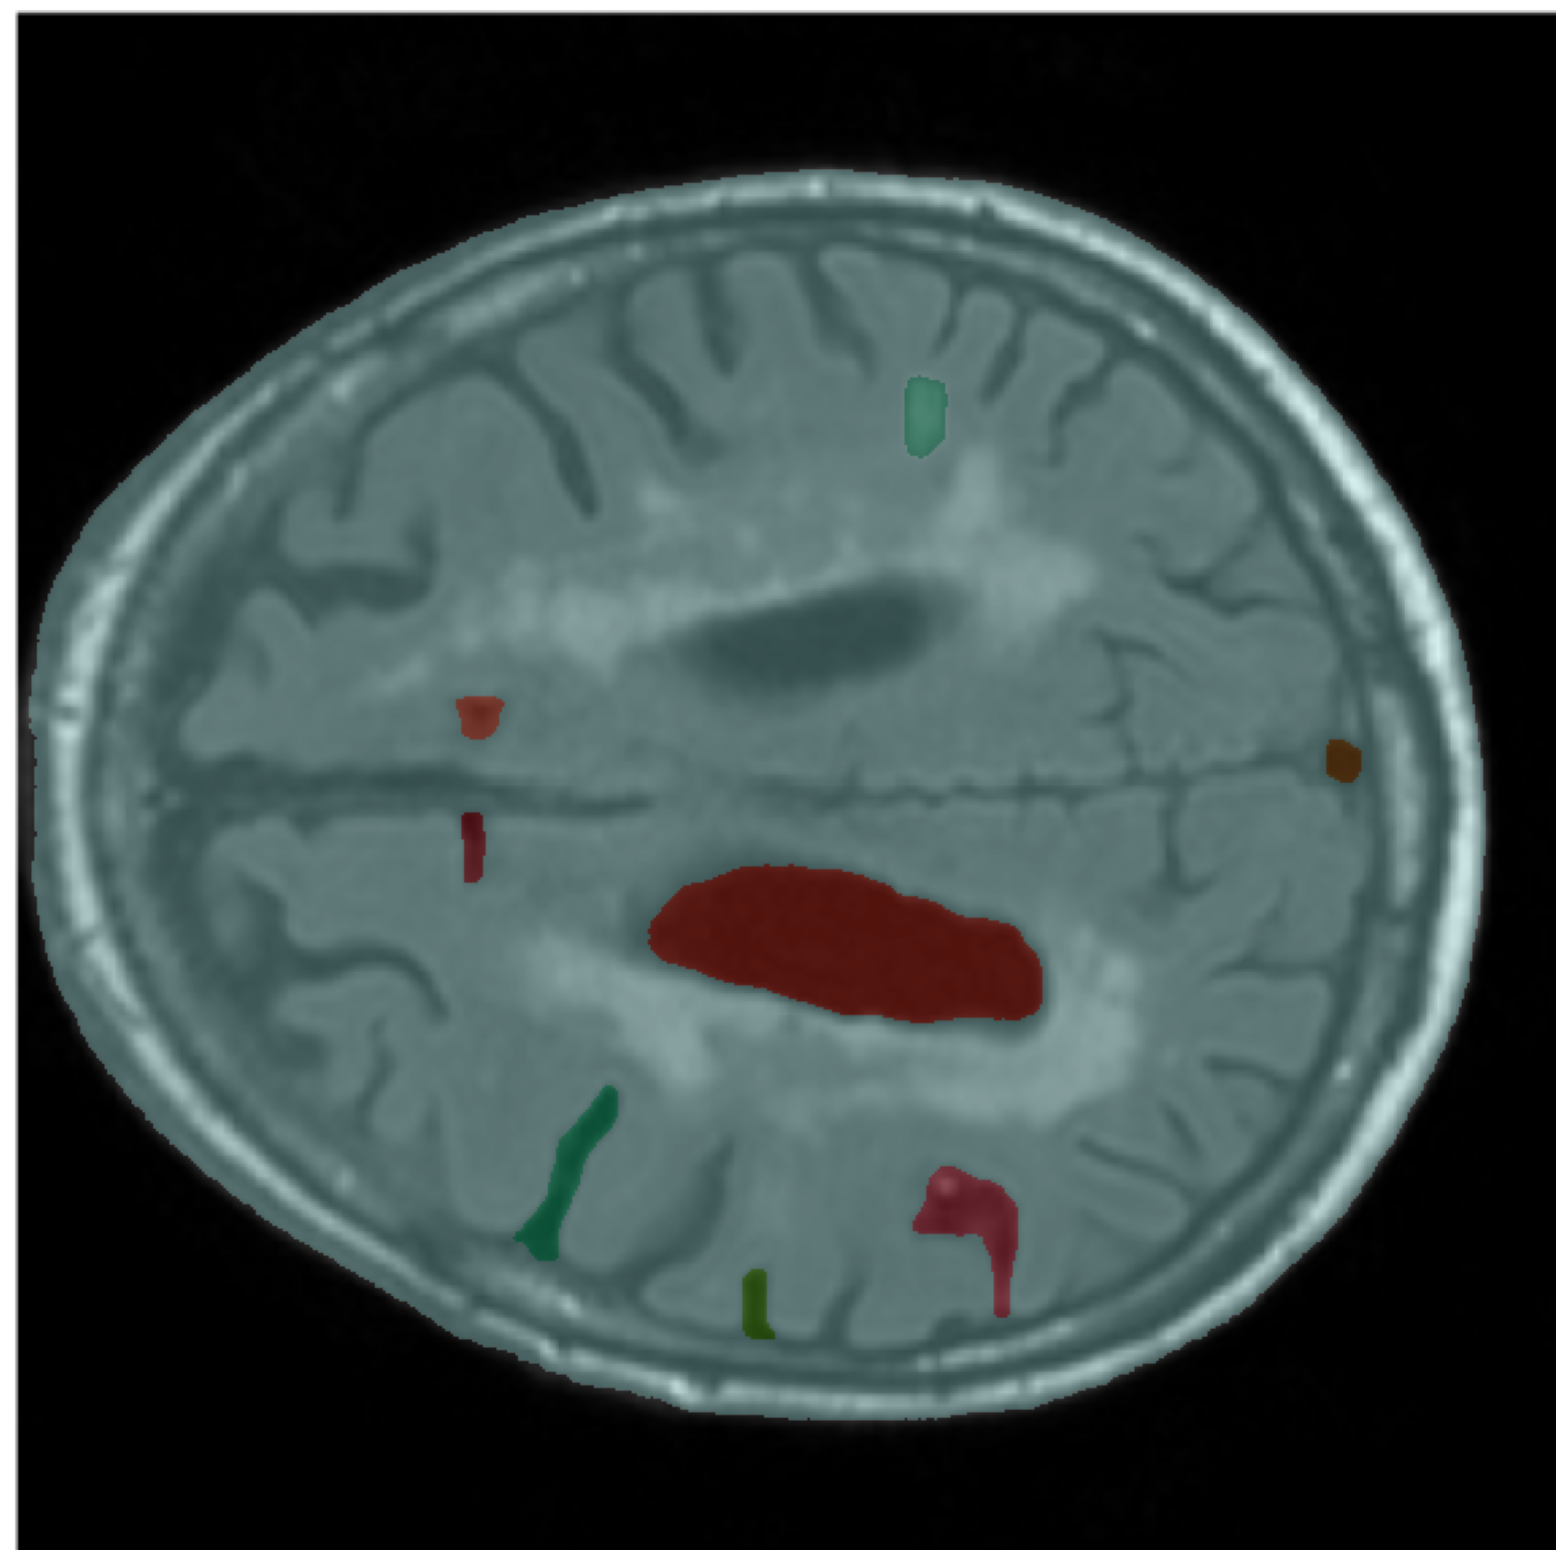

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 